<a href="https://colab.research.google.com/github/ram130849/Deep_Learning_Systems_Assignments/blob/main/TensorFlow/Tejas/Deep_Learning_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

Discussed with : Ramki Ramamurthy and Sushant Kotwal

References:</br>
1.https://www.tensorflow.org/tutorials/quickstart/beginner </br>
2.https://pyimagesearch.com/2021/05/06/implementing-feedforward-neural-networks-with-keras-and-tensorflow/</br>
3.https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/</br>
4.https://www.tensorflow.org/tensorboard/tensorboard_projector_plugin</br>
5.https://www.machinelearningplus.com/plots/subplots-python-matplotlib/#:~:text=Subplots%20mean%20a%20group%20of,canvas%20that%20holds%20multiple%20plots. </br>
6.https://numpy.org/doc/stable/reference/generated/numpy.argsort.html </br>
7.https://www.tensorflow.org/guide/keras/sequential_model </br>

In [62]:
#Path: TensorFlow/Tejas/
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline  

Found GPU at: /device:GPU:0


In [3]:

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.2


#Code to check connection and usage of GPU

In [4]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
2.8674760119999974
GPU (s):
0.04015276500000198
GPU speedup over CPU: 71x


# Build Network  
##Q1.1

In [107]:

# Plot ad hoc mnist instances
from tensorflow.keras.datasets import mnist

# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [108]:
# Lets see the shapes of each Data sets
print("TRAIN SET:")
print("Training Set X_train shape is : {}".format(X_train.shape))
print("Training Set y_train shape is : {}".format(y_train.shape))
print("____"*25)
print("TEST SET:")
print("Test Set X_test shape is : {}".format(X_test.shape))
print("Test Set y_test shape is : {}".format(y_test.shape))

TRAIN SET:
Training Set X_train shape is : (60000, 28, 28)
Training Set y_train shape is : (60000,)
____________________________________________________________________________________________________
TEST SET:
Test Set X_test shape is : (10000, 28, 28)
Test Set y_test shape is : (10000,)


5


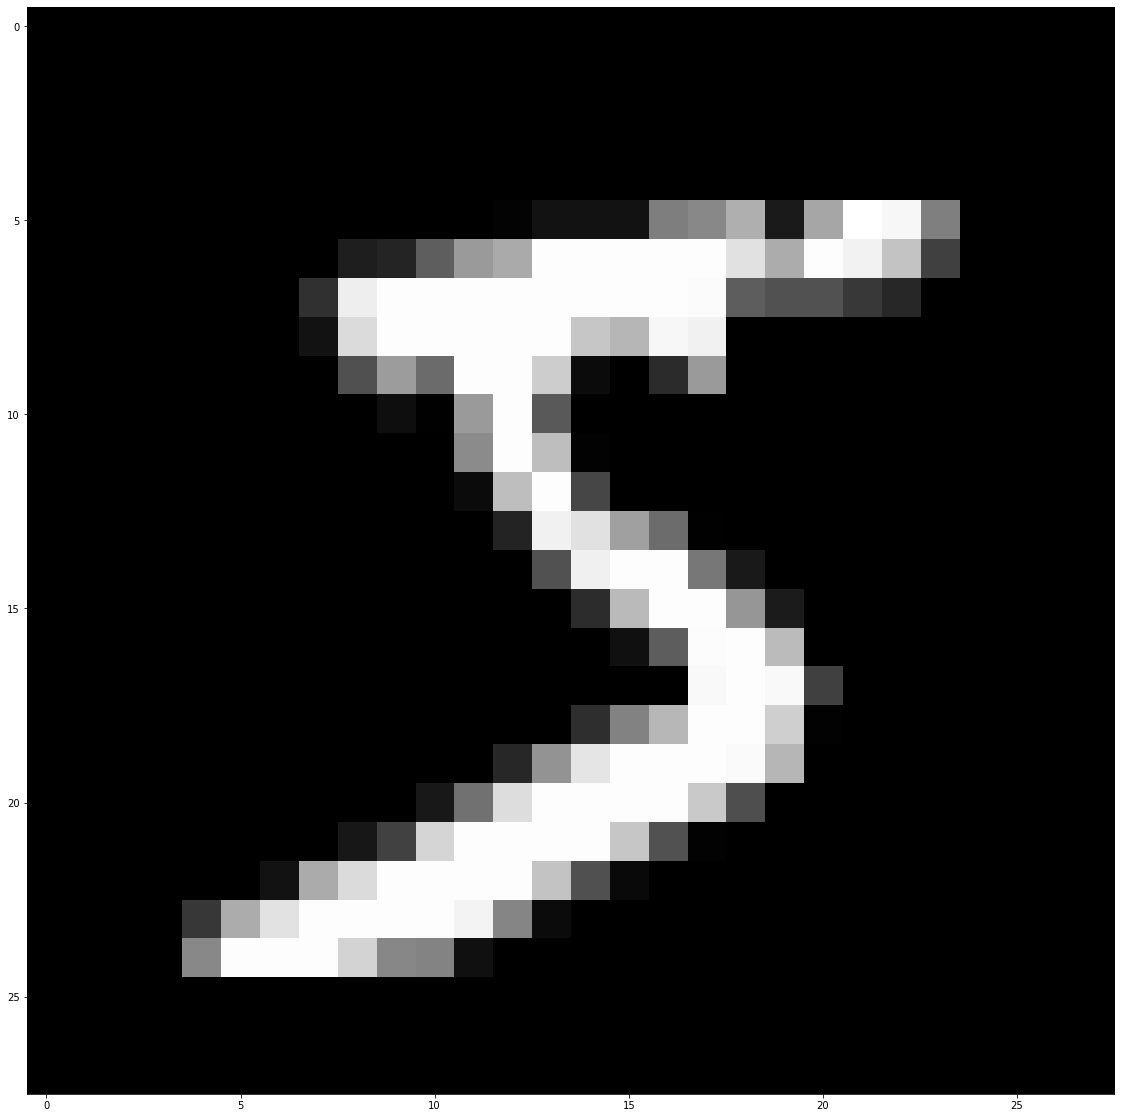

In [109]:
print(y_train[0])

# Lets its print an image
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))

# So y_train has the label and X_train has its vectorial representation

##Library for Model Definition

In [110]:
from tensorflow import keras
from tensorflow.keras import layers

In [112]:

model = tf.keras.Sequential([
    tf.keras.layers.Reshape(target_shape=(28 * 28,), input_shape=(28,28)),
    tf.keras.layers.Dense(units=1024,activation='relu'),
    tf.keras.layers.Dense(units=1024,activation='relu'),
    tf.keras.layers.Dense(units=1024,activation='relu'),
    tf.keras.layers.Dense(units=1024,activation='relu'),
    tf.keras.layers.Dense(units=1024,activation='relu', name="target_layer"),
    tf.keras.layers.Dense(units=10,activation='softmax')
  ])

In [161]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_3 (Reshape)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 1024)              803840    
                                                                 
 dense_27 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_28 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_29 (Dense)            (None, 1024)              1049600   
                                                                 
 target_layer (Dense)        (None, 1024)              1049600   
                                                                 
 dense_30 (Dense)            (None, 10)               

Check:
param_number = output_channel_number * (input_channel_number + 1)

Dense layer 1 = 1024 * [784 + 1] = 803840 

Dense layer 2 = 1024*1025 = 1049600

Intuition is that its the connections ( Weights ) between the two layers that are to be trained.

I used Relu cause it adds sparsity and also reduces vanishing gradients. Relu will straightaway remove a few features that are not useful. This I feel helps in many ways like reducing training time, reducing features considered ( more sparse ).

In [113]:

model.compile(optimizer='adam', 
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [114]:
history = model.fit(X_train,y_train,epochs = 30, batch_size = 256 )

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


235/235 [==============================] - 2s 5ms/step - loss: 3.3306 - accuracy: 0.8767
Epoch 2/30
235/235 [==============================] - 1s 5ms/step - loss: 0.1155 - accuracy: 0.9651
Epoch 3/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0773 - accuracy: 0.9758
Epoch 4/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0613 - accuracy: 0.9807
Epoch 5/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0502 - accuracy: 0.9837
Epoch 6/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0423 - accuracy: 0.9869
Epoch 7/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0460 - accuracy: 0.9864
Epoch 8/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0383 - accuracy: 0.9877
Epoch 9/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0358 - accuracy: 0.9887
Epoch 10/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0338 - accuracy: 0.9897
Epoch 11/3

In [115]:
accuracy = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1212 - accuracy: 0.9809


In [116]:
print("The Accuracy of the Model is {}".format(accuracy[-1]))

The Accuracy of the Model is 0.98089998960495


In [117]:
y_pred = model.predict(X_test)

In [118]:
y_pred.shape


(10000, 10)

Lets take First Output of the y_pred and lets plot its image and highest prediction and check if its right

In [119]:
y_pred[1]

array([3.9615053e-17, 8.0754742e-10, 1.0000000e+00, 7.8933527e-15,
       6.8053415e-18, 4.4639009e-19, 4.9843556e-15, 1.1046460e-16,
       2.1191497e-22, 4.2357602e-20], dtype=float32)

As we can see index 3 is highest (aka label 2)
</br>
Now lets plot its image

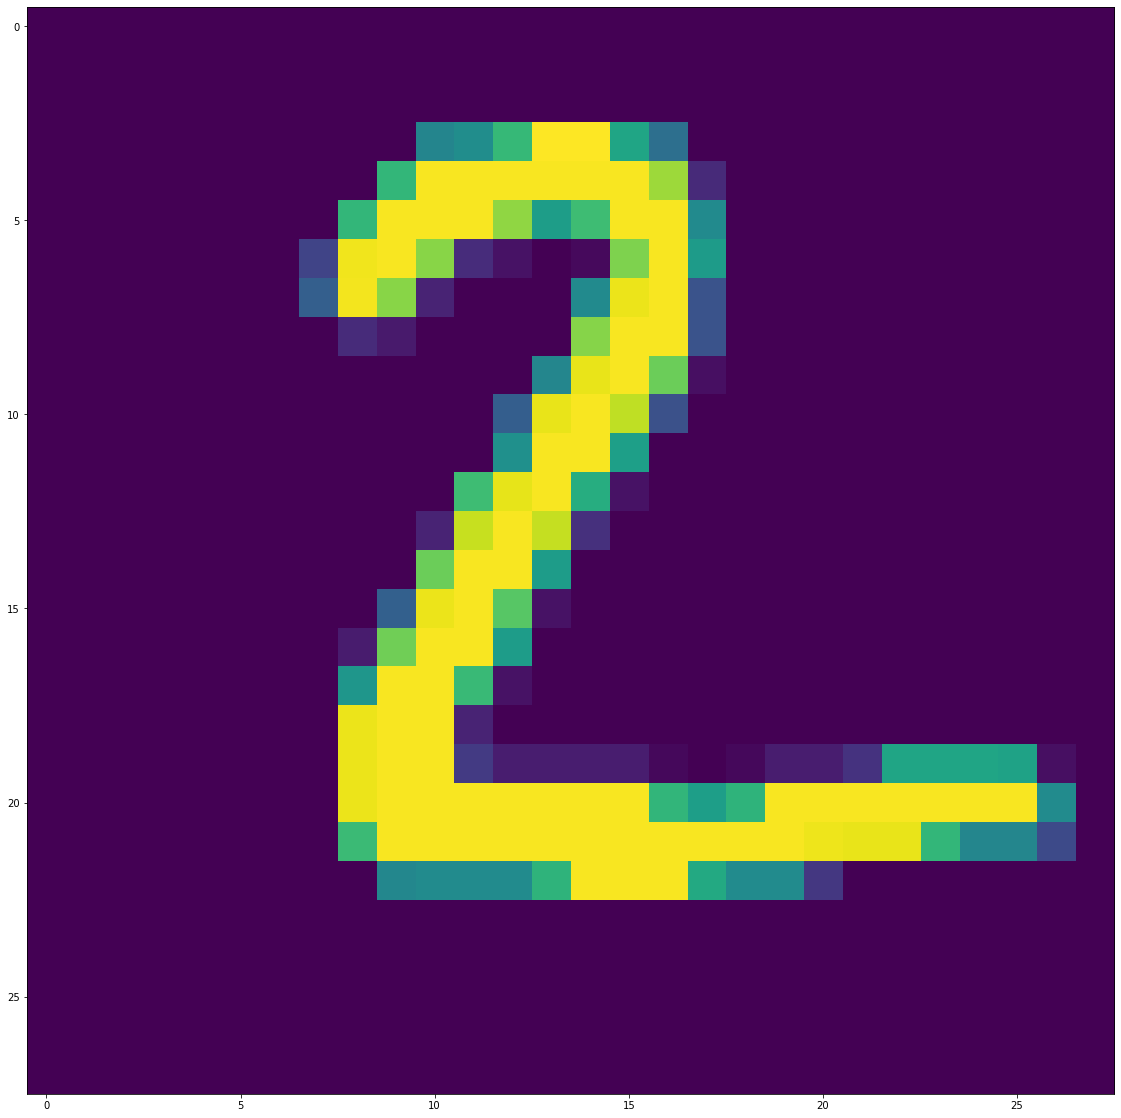

In [120]:
plt.imshow(X_test[1])


In [121]:
print(y_pred[1].argmax())


2


In [122]:
type(y_pred)

numpy.ndarray

## 1.3

Index of the chosen values ( agrsort on columns ( col is the label )
[ 25 851 845 271 592 407 485 312 564 586]
[523 189  29 473 276 745 964  94 476 840]
[174 775 764 744 741 731 728 280  35 186]
[687 925 923 727 734 747 112 753 683 369]
[752 535 748 484 287 968 838 295  85 198]
[710 711 218 856 638 127 433 261 364 333]
[ 66 650 201 665 886 680 943 942 130 623]
[263 859 852 301 832 825 307 636 254   0]
[401 621 961 128 470 260 232 134 226 693]
[862  73 481 639  78 487 235 496 634 999]
____________________________________________________________________________________________________
Plots : 




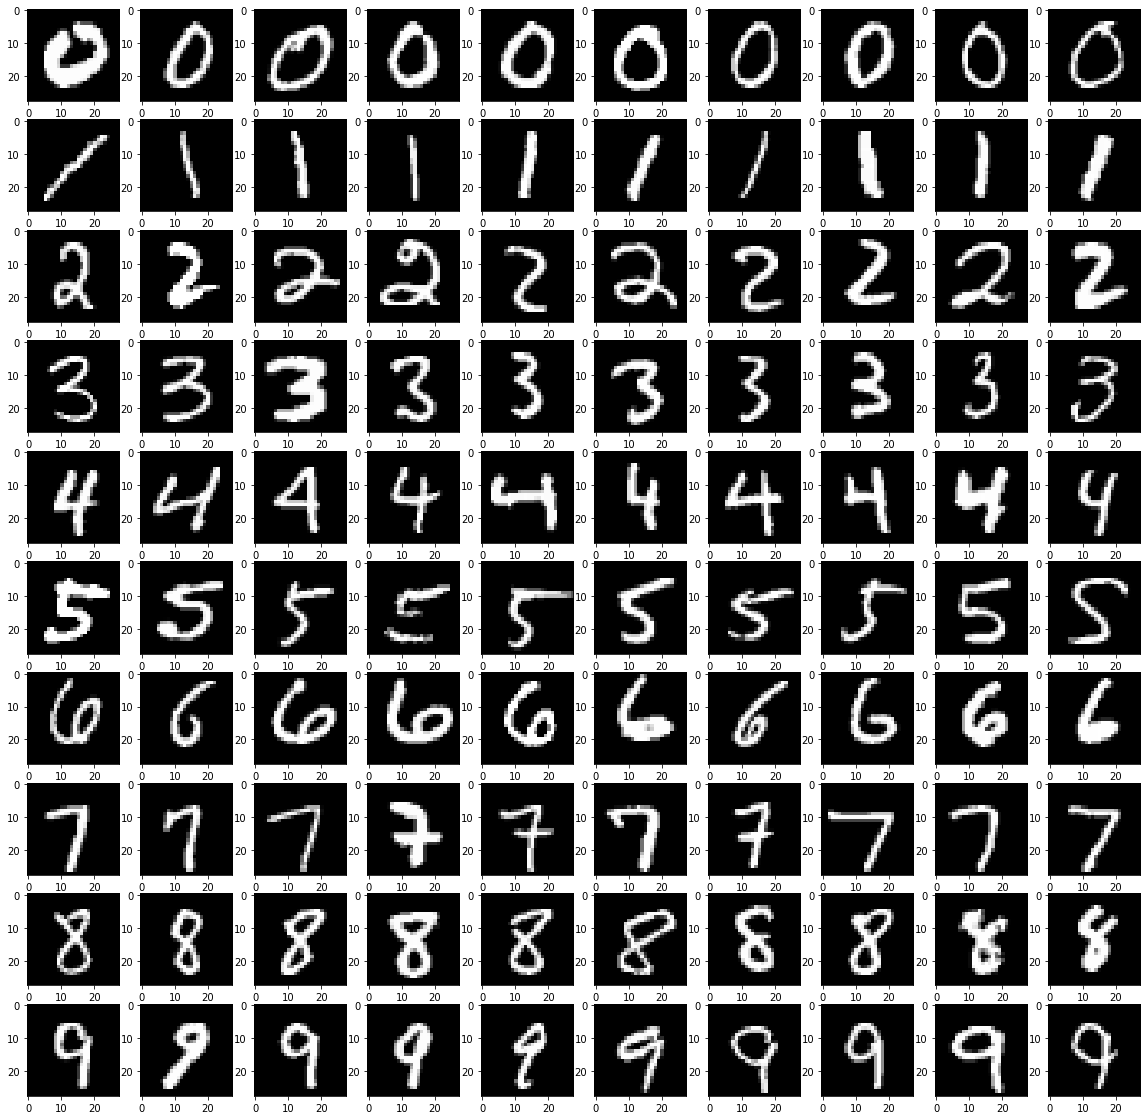

In [123]:
plt.rcParams['figure.figsize'] = (20,20) # Globally set the figure size
fig, axs = plt.subplots(10, 10)
y_pred_1000 = y_pred[:1000]
#range fxn starts from 0 
print("Index of the chosen values ( agrsort on columns ( col is the label )")
for i in range(10):
  chosen = y_pred_1000[:,i].argsort()[-10:][::1]
  print(chosen)
  for j in range(10):
    axs[i,j].imshow(X_test[chosen[j]], cmap=plt.get_cmap('gray'))

print("____"*25)
print("Plots : \n\n")
plt.show()

##1.4

In [124]:
y_pred_hlast = model.layers[-2].output
print(y_pred)

[[2.27134971e-21 2.53107641e-14 1.38223496e-19 ... 1.00000000e+00
  1.33510197e-14 3.61513450e-16]
 [3.96150527e-17 8.07547418e-10 1.00000000e+00 ... 1.10464597e-16
  2.11914974e-22 4.23576024e-20]
 [5.55441674e-12 9.99997973e-01 1.99246142e-06 ... 1.79156046e-09
  1.49925361e-09 1.44447612e-14]
 ...
 [6.76094221e-17 5.96371493e-16 8.93083079e-13 ... 1.96668379e-13
  1.05543290e-08 2.10704538e-08]
 [2.43828297e-27 1.43129708e-16 2.05627879e-22 ... 5.56153928e-35
  2.75819360e-15 7.33307003e-21]
 [3.96095612e-27 1.41646188e-33 1.04257845e-33 ... 0.00000000e+00
  7.40693897e-25 5.42571201e-33]]


In [125]:
y_pred_hlast.shape

TensorShape([None, 1024])

In [129]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_3 (Reshape)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 1024)              803840    
                                                                 
 dense_27 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_28 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_29 (Dense)            (None, 1024)              1049600   
                                                                 
 target_layer (Dense)        (None, 1024)              1049600   
                                                                 
 dense_30 (Dense)            (None, 10)               

In [149]:
feature_extractor = keras.Model(
    inputs=model.inputs,
    outputs=model.get_layer(name="target_layer").output,
)

features = feature_extractor(X_test[:10000])



In [150]:
features.shape

TensorShape([10000, 1024])

In [151]:
type(features)

tensorflow.python.framework.ops.EagerTensor

In [154]:
features1 = np.array(features)

In [155]:

np_features = tf.nn.softmax(features1[np.random.choice(a=range(10000),size=1000,replace=False),:][:,np.random.choice(a=range(1024),size=10,replace=False)]).numpy().argmax(axis=1)


In [156]:
np_features

array([0, 2, 2, 0, 0, 0, 0, 9, 0, 9, 0, 2, 2, 2, 9, 0, 0, 9, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 9, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 9, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 8, 0, 0, 0, 0, 2, 2, 0, 0, 6, 0, 0, 9, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 9, 9, 0, 9, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       9, 0, 9, 0, 0, 6, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 9, 0, 2, 9,
       0, 0, 0, 2, 0, 0, 0, 9, 9, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 9, 0, 0, 0, 0, 9, 0, 9, 0, 9, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 9, 0, 0, 0, 0, 0, 9, 0, 0, 9, 9, 0, 0, 2, 0, 0, 0, 2, 9, 0, 0,
       0, 2, 0, 0, 2, 9, 0, 0, 0, 0, 2, 0, 2, 9, 0, 0, 2, 0, 0, 0, 0, 9,
       0, 9, 0, 0, 0, 9, 2, 9, 0, 2, 2, 0, 9, 0, 9, 0, 0, 9, 9, 0, 9, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 9, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0,
       9, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9,
       0, 0, 0, 0, 0, 9, 0, 0, 0, 9, 0, 0, 2, 0, 0,

In [157]:
np_features.shape

(1000,)

In [158]:
np_features

array([0, 2, 2, 0, 0, 0, 0, 9, 0, 9, 0, 2, 2, 2, 9, 0, 0, 9, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 9, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 9, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 8, 0, 0, 0, 0, 2, 2, 0, 0, 6, 0, 0, 9, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 9, 9, 0, 9, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       9, 0, 9, 0, 0, 6, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 9, 0, 2, 9,
       0, 0, 0, 2, 0, 0, 0, 9, 9, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 9, 0, 0, 0, 0, 9, 0, 9, 0, 9, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 9, 0, 0, 0, 0, 0, 9, 0, 0, 9, 9, 0, 0, 2, 0, 0, 0, 2, 9, 0, 0,
       0, 2, 0, 0, 2, 9, 0, 0, 0, 0, 2, 0, 2, 9, 0, 0, 2, 0, 0, 0, 0, 9,
       0, 9, 0, 0, 0, 9, 2, 9, 0, 2, 2, 0, 9, 0, 9, 0, 0, 9, 9, 0, 9, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 9, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0,
       9, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9,
       0, 0, 0, 0, 0, 9, 0, 0, 0, 9, 0, 0, 2, 0, 0,

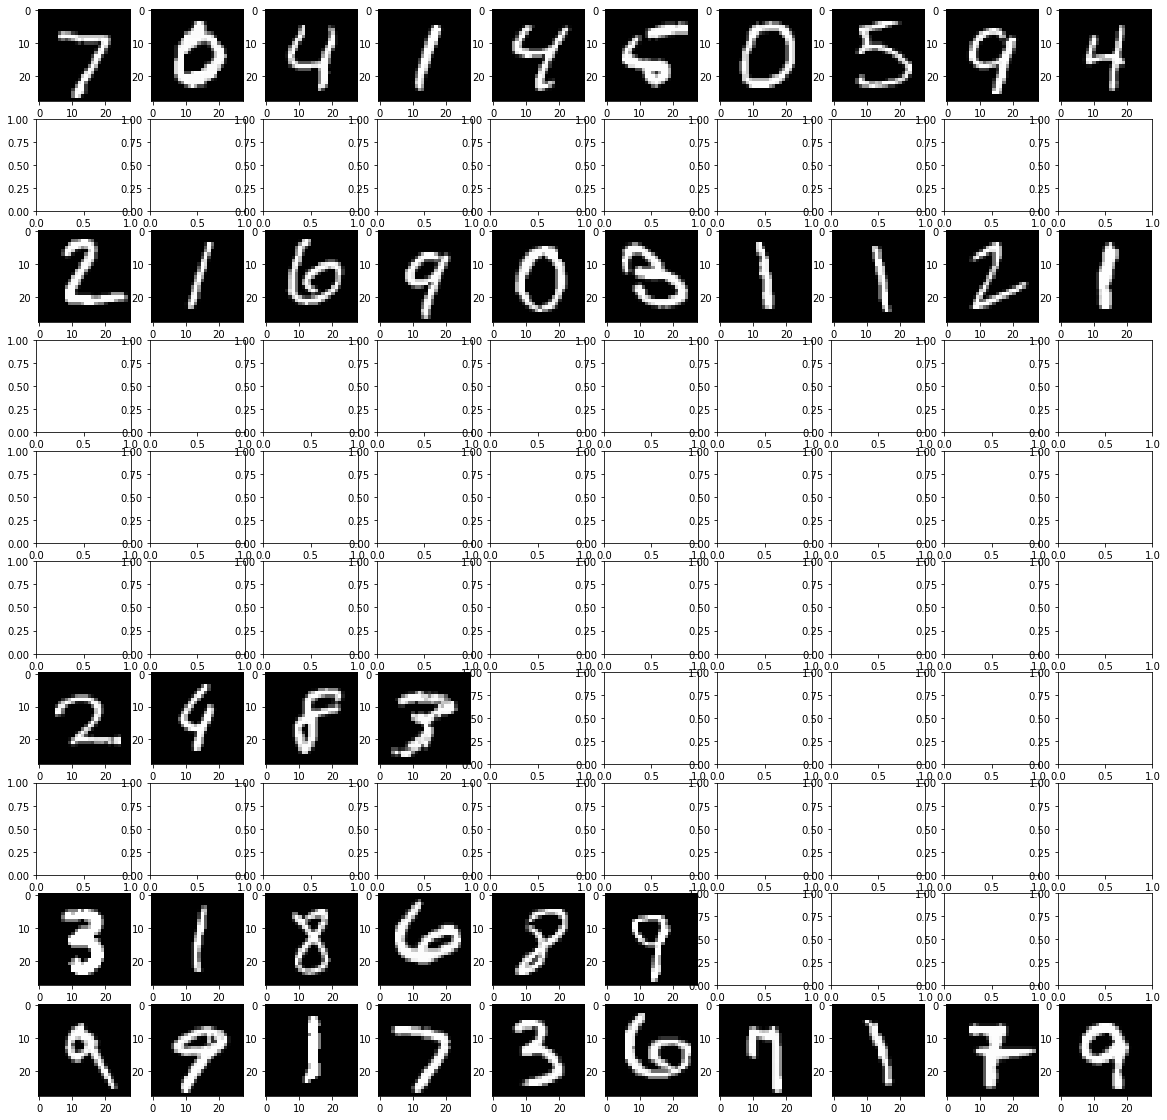

In [159]:
plt.rcParams['figure.figsize'] = (20,20) # Globally set the figure size
fig, axs = plt.subplots(10, 10)
for i in range(10):  
    result = np.where(np_features==i)[0][:10]
    for j in range(10):
      try:
          axs[i,j].imshow(X_test[result[j]], cmap=plt.get_cmap('gray'))
      except:
          continue
plt.show()


Basically out of 1024 features we ransomly took 10 feaures without any weight assigned. Now we plot these features. Since we skipped the entire feature mapping step ( feature transformation to feature reduction done in last layer ) </br>
we just pass our outputs to softmax and map it using a rudimentary logic that our randomly chosen features accurately tell us the label when put together.

##1.5 TSNE and PCA